In [1]:
import pandas as pd
import windpy as wp

In [12]:
## Read in an EPW file to a Pandas dataframe
def readNOAA_DesignDay(df):
    htg_996= df['Temperature'].quantile(q=0.004)
    htg_990= df['Temperature'].quantile(q=0.010)
    clg_004= df['Temperature'].quantile(q=0.996)
    clg_010= df['Temperature'].quantile(q=0.99)
    return htg_996,htg_990,clg_004,clg_010

In [17]:
def getDDFromNOAA(lat,lon,rad=10,years=10):
    stations = wp.NOAA.findStation(centre = [lat, lon], radius = rad, unit = 'km')
    startYear =stations['BEGIN'][0].year
    endYear = stations['END'][0].year
    newStartYear  = endYear-years
    if startYear > newStartYear:
        newStartYear = startYear
    if stations.shape[0] > 0:
        id_loc = stations.index.astype('str')[0]
    else:
        id_loc = None
    if id_loc is not None:
        raw_data = wp.NOAA.getNOAA(ID = id_loc, yearStart = newStartYear, yearEnd = endYear)
        df = raw_data[raw_data.Temperature != 999.9]
    else:
        df = None
    return df

In [19]:
st = getDDFromNOAA(29.794857,-95.81653)
st.describe()

Loading info local backup from C:\ProgramData\Anaconda3\lib\site-packages\windpy-0.3.0-py3.9.egg\windpy\NOAA\tempdata\isd-history.txt
Loading local backup from C:\ProgramData\Anaconda3\lib\site-packages\windpy-0.3.0-py3.9.egg\windpy\NOAA\tempdata\72061700208_2009_2022.pkl


,WindDir,WindSpeed,SeaLevelPressure,Temperature,DewPointTemp,CloudHgt,Visibility,OC1_0,MW1_0,AJ1_0,RH1_2
count,328658.000000,328658.00000,3.286580e+05,328658.000000,328658.000000,328658.000000,328658.000000,0.0,0.0,0.0,0.0
mean,340.417915,6.74892,9.999900e+03,20.737843,28.772562,19327.907637,31217.468712,NaN,NaN,NaN,NaN
std,344.354074,58.48823,5.871161e-08,8.629260,111.253987,22851.624747,131764.828174,NaN,NaN,NaN,NaN
min,10.000000,0.00000,9.999900e+03,-40.000000,-38.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,130.000000,1.50000,9.999900e+03,15.000000,10.000000,1311.000000,11265.000000,NaN,NaN,NaN,NaN
50%,180.000000,3.10000,9.999900e+03,22.000000,19.000000,22000.000000,16093.000000,NaN,NaN,NaN,NaN
75%,350.000000,4.60000,9.999900e+03,27.000000,23.000000,22000.000000,16093.000000,NaN,NaN,NaN,NaN
max,999.000000,999.90000,9.999900e+03,41.000000,999.900000,99999.000000,999999.000000,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

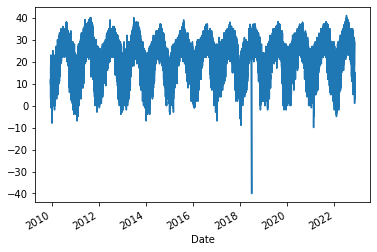

In [20]:
st['Temperature'].plot()

In [22]:
htg_996,htg_990,clg_004,clg_010 = readNOAA_DesignDay(st)
htg_996,htg_990,clg_004,clg_010

(-3.0, 0.0, 37.0, 36.0)

In [27]:
st = getDDFromNOAA(46.65,-60.95)
st.describe()

Loading info local backup from C:\ProgramData\Anaconda3\lib\site-packages\windpy-0.3.0-py3.9.egg\windpy\NOAA\tempdata\isd-history.txt
Loading local backup from C:\ProgramData\Anaconda3\lib\site-packages\windpy-0.3.0-py3.9.egg\windpy\NOAA\tempdata\71959026394_1983_1993.pkl


,WindDir,WindSpeed,SeaLevelPressure,Temperature,DewPointTemp,CloudHgt,Visibility,OC1_0,MW1_0,AJ1_0,RH1_2
count,16357.000000,16357.000000,16357.00000,16357.000000,16357.000000,16357.000000,16357.000000,0.0,0.0,0.0,0.0
mean,233.523812,6.072953,1019.71257,-10.838418,19.971841,12836.274745,21569.690897,NaN,NaN,NaN,NaN
std,233.310634,36.588405,172.33327,15.778016,179.405943,10618.620734,33207.072625,NaN,NaN,NaN,NaN
min,10.000000,0.000000,976.40000,-45.400000,-46.700000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,90.000000,2.600000,1009.80000,-24.400000,-25.500000,900.000000,24000.000000,NaN,NaN,NaN,NaN
50%,170.000000,4.600000,1016.10000,-11.700000,-11.100000,22000.000000,24000.000000,NaN,NaN,NaN,NaN
75%,290.000000,6.200000,1022.70000,2.700000,1.500000,22000.000000,24000.000000,NaN,NaN,NaN,NaN
max,999.000000,999.900000,9999.90000,27.700000,999.900000,99999.000000,999999.000000,NaN,NaN,NaN,NaN


In [28]:
htg_996,htg_990,clg_004,clg_010 = readNOAA_DesignDay(st)
htg_996,htg_990,clg_004,clg_010

(-42.0, -39.8, 22.2, 19.74400000000005)